In [27]:
# Importing the libraries
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import matplotlib.pyplot as plt

In [15]:
# Splitting the datasets and Normalization
train_data = ImageDataGenerator(rescale = 1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
test_data = ImageDataGenerator(rescale=1.0/255)

train_gen = train_data.flow_from_directory("Dataset/Train/",
                                                    batch_size =256 ,
                                                    class_mode = 'binary', 
                                                    target_size = (64, 64))

validation_gen = test_data.flow_from_directory("Dataset/Validation/",
                                                          batch_size  = 256,
                                                          class_mode  = 'binary', 
                                                          target_size = (64, 64))

Found 160000 images belonging to 2 classes.
Found 22598 images belonging to 2 classes.


In [17]:
# Creating the Model
model = tf.keras.models.Sequential([
    # 1st conv
  tf.keras.layers.Conv2D(96, (11,11),strides=(4,4), activation='relu', input_shape=(64, 64, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2,2)),
    # 2nd conv
  tf.keras.layers.Conv2D(256, (11,11),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
     # 3rd conv
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    # 4th conv
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    # 5th Conv
  tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2, 2)),
  # To Flatten layer
  tf.keras.layers.Flatten(),
  # To FC layer 1
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  #To FC layer 2
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1, activation='sigmoid')
  ])
model.compile(
    optimizer=Adam(lr=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
hist = model.fit_generator(generator=train_gen,
                           validation_data=validation_gen,
                           steps_per_epoch=256,
                           validation_steps=256,
                           epochs=12)

Epoch 1/12
256/256 [==============================] - 2436s 10s/step - loss: 0.8997 - acc: 0.5776 - val_loss: 0.6615 - val_acc: 0.6116
Epoch 2/12
256/256 [==============================] - 2404s 9s/step - loss: 0.5539 - acc: 0.7185 - val_loss: 0.4553 - val_acc: 0.7856
Epoch 3/12
256/256 [==============================] - 2477s 10s/step - loss: 0.4845 - acc: 0.7712 - val_loss: 0.3989 - val_acc: 0.8147
Epoch 4/12
256/256 [==============================] - 2897s 11s/step - loss: 0.4470 - acc: 0.7912 - val_loss: 0.4381 - val_acc: 0.7764
Epoch 5/12
256/256 [==============================] - 2648s 10s/step - loss: 0.4123 - acc: 0.8137 - val_loss: 0.4516 - val_acc: 0.8096
Epoch 6/12
256/256 [==============================] - 2499s 10s/step - loss: 0.3796 - acc: 0.8335 - val_loss: 0.6771 - val_acc: 0.6646
Epoch 7/12
256/256 [==============================] - 2182s 9s/step - loss: 0.3444 - acc: 0.8488 - val_loss: 0.2677 - val_acc: 0.8850
Epoch 8/12
256/256 [==============================] - 214

In [20]:
model.save('gender-classification-cnn-epochs-12.h5')

In [22]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 14, 14, 96)        34944     
_________________________________________________________________
batch_normalization_25 (Batc (None, 14, 14, 96)        384       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 96)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 7, 7, 256)         2973952   
_________________________________________________________________
batch_normalization_26 (Batc (None, 7, 7, 256)         1024      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 7, 7, 384)         885120    
_________________________________________________________________
batch_normalization_27 (Batc (None, 7, 7, 384)        

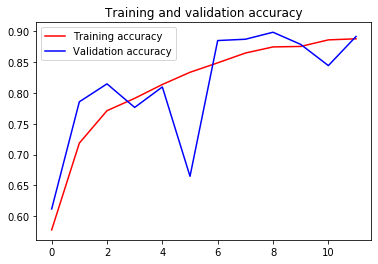

<Figure size 432x288 with 0 Axes>

In [26]:
# Plotting the accuracy of the Model (Training v Validation)
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

[0.]
The person in the image is female.


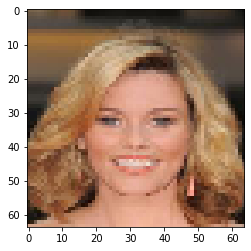

In [41]:
# predicting the images and testing the model for both male and female image samples
path = "Dataset/Test/Female/160091.jpg"
# path = "Dataset/Test/Male/160472.jpg"
img = image.load_img(path, target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=1)
print(classes[0])
if classes[0]>0.5:
    print("The person in the image is male.")
else:
    print( "The person in the image is female.")
plt.imshow(img)